# Crop Recommendation based on different Features

# Setup (importing required libraries)

In [1]:
#Importing Liabraries

import numpy as np
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For interactivity
from ipywidgets import interact

#For warnings
import warnings
warnings.filterwarnings('ignore')

#For Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Loading Dataset
data = pd.read_csv('..\dataset\Crop_Recommendation.csv')
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


# 1.Exploratory Data Analysis

In [3]:
#Shape of dataset
print("Shape of the dataset :",data.shape)

Shape of the dataset : (2200, 8)


In [4]:
#Checking missing values
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [5]:
#Checking Crops present in Dataset
data['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [6]:
#Checking the Statistics for all the crops
print("Average Ratio of Nitrogen in the soil : {0: .2f}".format(data['Nitrogen'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(data['Phosphorus'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(data['Potassium'].mean()))
print("Average Temperature in Celsius : {0: .2f}".format(data['Temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(data['Humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(data['pH_Value'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(data['Rainfall'].mean()))

Average Ratio of Nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average Temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


#### Above shows that nitrogen,Phosphorous and potassium should be around 50%
#### Temperature should be around 25°C and Humidity around 70%
#### Rain fall should be around 100mm and PH should be around 7

In [7]:
#Checking Statistics for each Crop

@interact
def summary(crops = list(data['Crop'].value_counts().index)):
    x = data[data['Crop'] == crops]
    print("-------------------------------------------------")
    print("Statistics for Nitrogen :")
    print("Minimum Nitrogen Required :", x['Nitrogen'].min())
    print("Average Nitrogen Required :", x['Nitrogen'].mean())
    print("Maximum Nitrogen Required :", x['Nitrogen'].max())
    print("-------------------------------------------------")
    print("Statistics for Phosphorous :")
    print("Minimum Phosphorous Required :", x['Phosphorus'].min())
    print("Average Phosphorous Required :", x['Phosphorus'].mean())
    print("Maximum Phosphorous Required :", x['Phosphorus'].max())
    print("-------------------------------------------------")
    print("Statistics for Potassium :")
    print("Minimum Potassium Required :", x['Potassium'].min())
    print("Average Potassium Required :", x['Potassium'].mean())
    print("Maximum Potassium Required :", x['Potassium'].max())
    print("-------------------------------------------------")
    print("Statistics for Temperature :")
    print("Minimum Temperature Required : {0: .2f}".format(x['Temperature'].min()))
    print("Average Temperature Required : {0: .2f}".format(x['Temperature'].mean()))
    print("Maximum Temperature Required : {0: .2f}".format(x['Temperature'].max()))
    print("-------------------------------------------------")
    print("Statistics for Humidity :")
    print("Minimum Humidity Required : {0: .2f}".format(x['Humidity'].min()))
    print("Average Humidity Required : {0: .2f}".format(x['Humidity'].mean()))
    print("Maximum Humidity Required : {0: .2f}".format(x['Humidity'].max()))
    print("-------------------------------------------------")
    print("Statistics for PH :")
    print("Minimum PH Required : {0: .2f}".format(x['pH_Value'].min()))
    print("Average PH Required : {0: .2f}".format(x['pH_Value'].mean()))
    print("Maximum PH Required : {0: .2f}".format(x['pH_Value'].max()))
    print("-------------------------------------------------")
    print("Statistics for Rainfall :")
    print("Minimum Rainfall Required : {0: .2f}".format(x['Rainfall'].min()))
    print("Average Rainfall Required : {0: .2f}".format(x['Rainfall'].mean()))
    print("Maximum Rainfall Required : {0: .2f}".format(x['Rainfall'].max()))
    print("-------------------------------------------------")
    

interactive(children=(Dropdown(description='crops', options=('Rice', 'Maize', 'Jute', 'Cotton', 'Coconut', 'Pa…

#### We can find statistics of any other crop by selecting on drop down list

In [8]:
# Lets compare the average Requirement for eash crops with average conditions

@interact
def compare(conditions = ['Nitrogen','Phosphorous','Potassium','Temperature','pH_Value','Humidity','Rainfall']):
    print("Average Value for",conditions,"is {0: .2f}".format(data[conditions].mean()))
    print("----------------------------------------------------------------")
    print("Rice : {0: .2f}".format(data[(data['Crop'] == 'Rice')][conditions].mean()))
    print("Black Grams : {0: .2f}".format(data[(data['Crop'] == 'Blackgram')][conditions].mean()))
    print("Banana : {0: .2f}".format(data[(data['Crop'] == 'Banana')][conditions].mean()))
    print("Jute : {0: .2f}".format(data[(data['Crop'] == 'Jute')][conditions].mean()))
    print("Coconut : {0: .2f}".format(data[(data['Crop'] == 'Coconut')][conditions].mean()))
    print("Apple : {0: .2f}".format(data[(data['Crop'] == 'Apple')][conditions].mean()))
    print("Papaya : {0: .2f}".format(data[(data['Crop'] == 'Papaya')][conditions].mean()))
    print("Muskmelon : {0: .2f}".format(data[(data['Crop'] == 'Muskmelon')][conditions].mean()))
    print("Grapes : {0: .2f}".format(data[(data['Crop'] == 'Grapes')][conditions].mean()))
    print("Watermelon : {0: .2f}".format(data[(data['Crop'] == 'Watermelon')][conditions].mean()))
    print("Kedney Beans : {0: .2f}".format(data[(data['Crop'] == 'KidneyBeans')][conditions].mean()))
    print("Mung Beans : {0: .2f}".format(data[(data['Crop'] == 'MungBean')][conditions].mean()))
    print("Oranges : {0: .2f}".format(data[(data['Crop'] == 'Orange')][conditions].mean()))
    print("Chick Peas : {0: .2f}".format(data[(data['Crop'] == 'ChickPea')][conditions].mean()))
    print("Lentils : {0: .2f}".format(data[(data['Crop'] == 'Lentil')][conditions].mean()))
    print("Cotton : {0: .2f}".format(data[(data['Crop'] == 'Cotton')][conditions].mean()))
    print("Maize : {0: .2f}".format(data[(data['Crop'] == 'Maize')][conditions].mean()))
    print("Moth Beans : {0: .2f}".format(data[(data['Crop'] == 'MothBeans')][conditions].mean()))
    print("Pigeon peas : {0: .2f}".format(data[(data['Crop'] == 'PigeonPeas')][conditions].mean()))
    print("Mango : {0: .2f}".format(data[(data['Crop'] == 'Mango')][conditions].mean()))
    print("Pomegrante : {0: .2f}".format(data[(data['Crop'] == 'Pomegranate')][conditions].mean()))
    print("Coffee : {0: .2f}".format(data[(data['Crop'] == 'Coffee')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorous', 'Potassium', 'Tem…

### We can find rainfall,temperature,humidity,Nitrogen,Potassium,Phosphorous and ph value of every individual crop by selecting on the drop down menu.

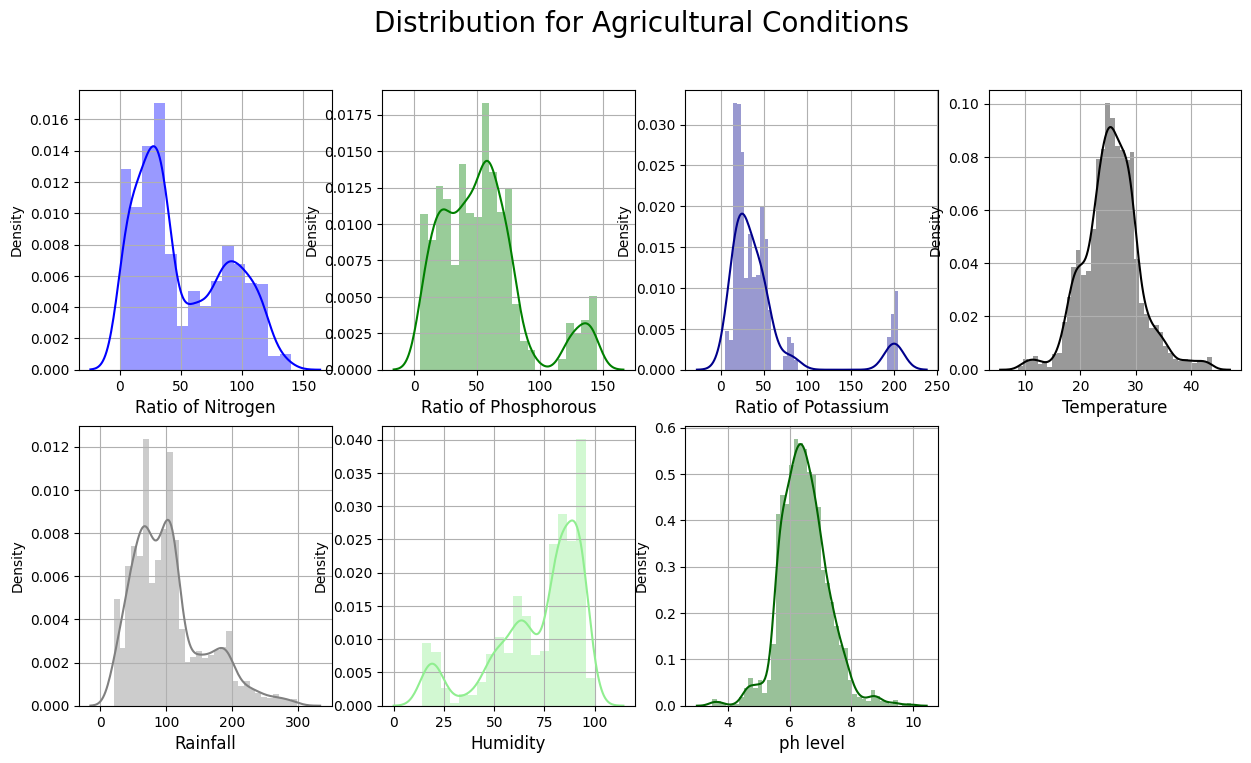

In [9]:
#Distribution for Agricultural Conditions
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(data['Nitrogen'],color = 'blue')
plt.xlabel('Ratio of Nitrogen',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['Phosphorus'],color = 'green')
plt.xlabel('Ratio of Phosphorous',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Potassium'],color = 'darkblue')
plt.xlabel('Ratio of Potassium',fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['Temperature'],color = 'black')
plt.xlabel('Temperature',fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['Rainfall'],color = 'grey')
plt.xlabel('Rainfall',fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['Humidity'],color = 'lightgreen')
plt.xlabel('Humidity',fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['pH_Value'],color = 'darkgreen')
plt.xlabel('ph level',fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

### Above Graph shows us many hidden patterns like many crops need Phosphorous and Potassium at very high level.
### Need of rain,temperature and ph value vary from crop to crop.

# 2.Hidden Patterns

In [10]:
# Crops requires more rainfall,temperature,humidity,Nitrogen,Potassium,Phosphorous and ph value VS Crops requires Less 
@interact
def compare(conditions = ['Nitrogen','Phosphorus','Potassium','Temperature','pH_Value','Humidity','Rainfall']):
    print("Crops which require greater than average",conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['Crop'].unique())
    print("-------------------------------------------------------")
    print("Crops which require less than average",conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['Crop'].unique())

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'Temp…

In [11]:
# Crops which Require more Rainfall vs Crops which Require Less Rainfall
print("Crops which requires very High rainfall:",data[data['Rainfall'] > 200]['Crop'].unique())
print("Crops which requires very Low rainfall:",data[data['Rainfall'] < 40]['Crop'].unique())

Crops which requires very High rainfall: ['Rice' 'Papaya' 'Coconut']
Crops which requires very Low rainfall: ['MothBeans' 'MungBean' 'Lentil' 'Muskmelon']


In [12]:
print("Crops which requires very High ratio of Nitrogen Content in soil :",data[data['Nitrogen'] > 120]['Crop'].unique())
print("Crops which requires very High ratio of Phosphorous Content in soil :",data[data['Phosphorus'] > 100]['Crop'].unique())
print("Crops which requires very High ratio of Potassium Content in soil :",data[data['Potassium'] > 200]['Crop'].unique())
print("Crops which requires very High Rainfall :",data[data['Rainfall'] > 200]['Crop'].unique())
print("Crops which requires very Low Rainfall:",data[data['Rainfall'] < 40]['Crop'].unique())
print("Crops which requires very Low Temperature :",data[data['Temperature'] < 10]['Crop'].unique())
print("Crops which requires very High Temperature :",data[data['Temperature'] > 40]['Crop'].unique())
print("Crops which requires very Low Humidity :",data[data['Humidity'] < 20]['Crop'].unique())
print("Crops which requires very Low pH :",data[data['pH_Value'] < 4]['Crop'].unique())
print("Crops which requires very High pH :",data[data['pH_Value'] > 8]['Crop'].unique())

Crops which requires very High ratio of Nitrogen Content in soil : ['Cotton']
Crops which requires very High ratio of Phosphorous Content in soil : ['Grapes' 'Apple']
Crops which requires very High ratio of Potassium Content in soil : ['Grapes' 'Apple']
Crops which requires very High Rainfall : ['Rice' 'Papaya' 'Coconut']
Crops which requires very Low Rainfall: ['MothBeans' 'MungBean' 'Lentil' 'Muskmelon']
Crops which requires very Low Temperature : ['Grapes']
Crops which requires very High Temperature : ['Grapes' 'Papaya']
Crops which requires very Low Humidity : ['ChickPea' 'KidneyBeans']
Crops which requires very Low pH : ['MothBeans']
Crops which requires very High pH : ['ChickPea' 'MothBeans']


In [13]:
# By using dataset, Find the best suitable Crop for Summer Season,Winter Season and Rainy Season
print("Summer Crops")
print(data[(data['Temperature'] > 30) & (data['Humidity'] > 50)]['Crop'].unique())
print("--------------------------------------------------------------------------")
print("Winter Crops")
print(data[(data['Temperature'] < 20) & (data['Humidity'] > 30)]['Crop'].unique())
print("--------------------------------------------------------------------------")
print("Rainy Crops")
print(data[(data['Rainfall'] > 200) & (data['Humidity'] > 30)]['Crop'].unique())

Summer Crops
['PigeonPeas' 'MothBeans' 'Blackgram' 'Mango' 'Grapes' 'Orange' 'Papaya']
--------------------------------------------------------------------------
Winter Crops
['Maize' 'PigeonPeas' 'Lentil' 'Pomegranate' 'Grapes' 'Orange']
--------------------------------------------------------------------------
Rainy Crops
['Rice' 'Papaya' 'Coconut']


# 3.Clustering Analysis

In [14]:
#Removing the Labels column 
x = data.drop(['Crop'], axis=1)

#Selecting all values of data
x = x.values

#Checking the shape
print(x.shape)

(2200, 7)


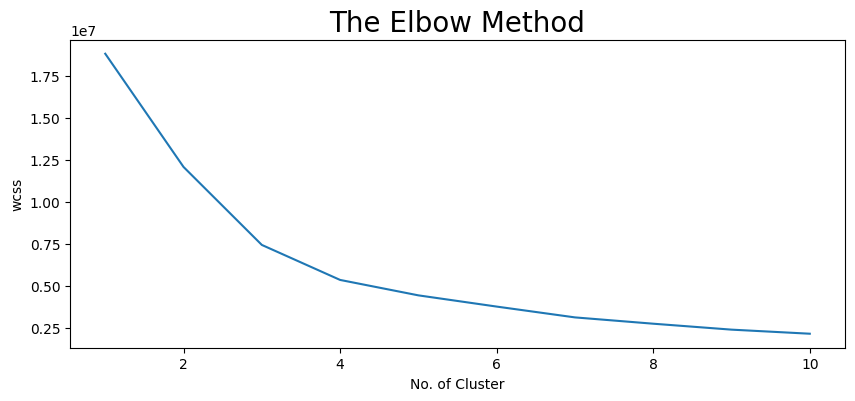

In [15]:
#Determining Optimum number of Clusters within Dataset by using K-means Clustering
plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting the Results
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('No. of Cluster')
plt.ylabel('wcss')
plt.show()

### By using Elbow method,we concluded that dataset consists of four clusters.

In [16]:
#Implementing K-means Algorithm to perform Clustering Analysis
km = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Lets find out results
a = data['Crop']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a],axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking Clusters of Each crop
print("Checking results after applying K-means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['Crop'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['Crop'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['Crop'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['Crop'].unique())

Checking results after applying K-means Clustering Analysis 

Crops in First Cluster: ['Grapes' 'Apple']
---------------------------------------------------------------
Crops in Second Cluster: ['Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans' 'MungBean'
 'Blackgram' 'Lentil' 'Pomegranate' 'Mango' 'Orange' 'Papaya' 'Coconut']
---------------------------------------------------------------
Crops in Third Cluster: ['Maize' 'Banana' 'Watermelon' 'Muskmelon' 'Papaya' 'Cotton' 'Coffee']
---------------------------------------------------------------
Crops in Forth Cluster: ['Rice' 'PigeonPeas' 'Papaya' 'Coconut' 'Jute' 'Coffee']


# 4.Predictive Modelling

In [17]:
#Splitting dataset for Predictive Modelling
y = data['Crop']
x = data.drop(['Crop'],axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [22]:
#Training and Testing Sets for Validation of Results
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of x train: (1760, 7)
The shape of x test: (440, 7)
The shape of y train: (1760,)
The shape of y test: (440,)


In [23]:
#Creating a Predictive model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

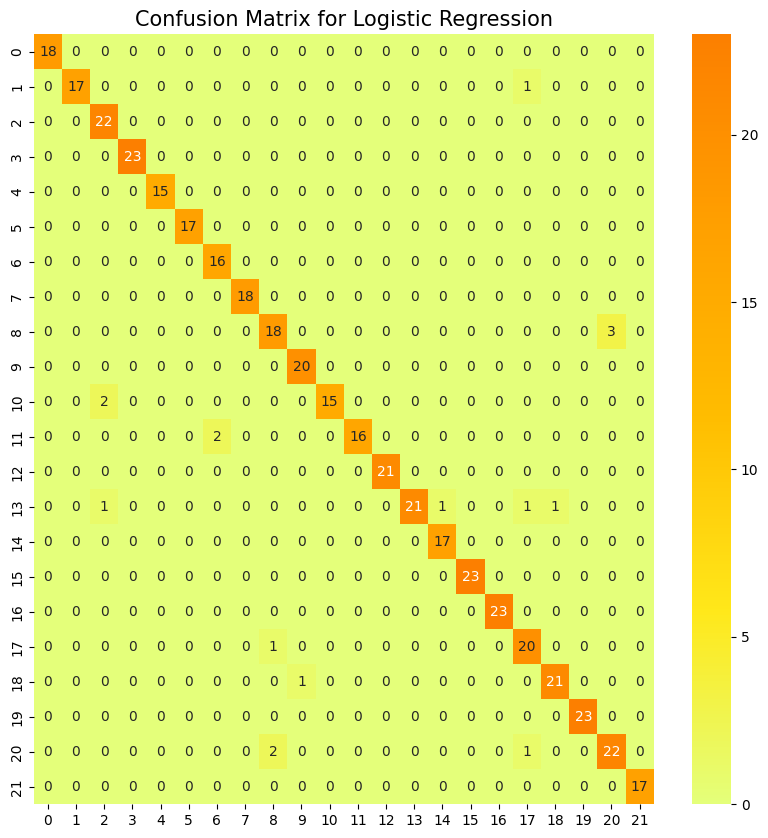

In [24]:
#Evaluating Model Performance by using confusion matrix
plt.rcParams['figure.figsize'] = [10,10]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [25]:
#Printing Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        18
      Banana       1.00      0.94      0.97        18
   Blackgram       0.88      1.00      0.94        22
    ChickPea       1.00      1.00      1.00        23
     Coconut       1.00      1.00      1.00        15
      Coffee       1.00      1.00      1.00        17
      Cotton       0.89      1.00      0.94        16
      Grapes       1.00      1.00      1.00        18
        Jute       0.86      0.86      0.86        21
 KidneyBeans       0.95      1.00      0.98        20
      Lentil       1.00      0.88      0.94        17
       Maize       1.00      0.89      0.94        18
       Mango       1.00      1.00      1.00        21
   MothBeans       1.00      0.84      0.91        25
    MungBean       0.94      1.00      0.97        17
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00        23
      Papaya       0.87    

### As we can see that for all 22 classes we have high precision and recall values which shows that our Predictive model works very well.

In [26]:
# Our model is ready,now we use model to predict Crop name
data.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [27]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The suggested Crop for Given Climatic condition is :", prediction)

The suggested Crop for Given Climatic condition is : ['Rice']


### Performance of our Predictive model is excellent, Now we are going to change our input values.

In [28]:
data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [29]:
prediction = model.predict((np.array([[107,
                                       34,
                                       34,
                                       26,
                                       66,
                                       6,
                                       180]])))
print("The suggested Crop for Given Climatic condition is :", prediction)

The suggested Crop for Given Climatic condition is : ['Coffee']


### Our Predictive Model works very well.
### This Predictive model is usefull for Modern Farming.

# Now saving the model

In [31]:
import pickle

# Save the model as a pickle file
with open('crop_recommendation_model.pkl', 'wb') as file:
    pickle.dump(model, file)
